In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Estimando $\pi$ con el método Monte Carlo

Vamos a calcular esta constante con el uso de números aleatorios. Esta es la base para calcular otras cantidades más complicadas en otros problemas o para realizar "simulaciones", donde vale la pena utilizar Monte Carlo por sobre otros métodos.

Para ello hay que considerar un cuadrado de lado 2 centrado en 0. En él vamos a inscribir un círculo de radio 1. Sabemos que la razón de sus áreas es

$$ \frac{\text{Área círculo}}{\text{Área cuadrado}} = \frac{\pi (a/2)^2}{a^2} = \frac{\pi}{4} $$

Si despejamos $\pi$,

$$ \pi = 4 \frac{\text{Área círculo}}{\text{Área cuadrado}} $$



### Números aleatorios

Si ahora llenamos el cuadrado con puntos al azar, extraídos de una **distribución uniforme** entre -1 y 1 $\mathcal{U}(-1,1)$ en cada eje, la razón entre puntos dentro del círculo versus de puntos dentro del cuadrado es (debido a que es equiprobable el caer en cualquier parte del cuadrado):

$$\frac{\text{Puntos dentro del círculo}}{\text{Puntos dentro del cuadrado}} \approx \frac{\text{Área círculo}}{\text{Área cuadrado}}$$

Es de esperar que mientras más puntos sampleemos, esta aproximación sea más exacta.

Reemplazando en lo anterior, $\pi$ puede ser estimado como

$$ \pi \approx 4 \frac{\text{Puntos dentro del círculo}}{\text{Puntos dentro del cuadrado}} $$

### Traducido a Python...

Tenemos cómo generar números aleatorios, así que solo falta calcular la razón, ¿Cómo? Contando. Los puntos dentro del círculo, son los que estarán dentro del radio de largo $1$. Los puntos siempre estarán dentro del cuadrado.

PS. Debido a la simetría del problema, podríamos haber hecho esto en solo un cuadrante

pi =  3.141148


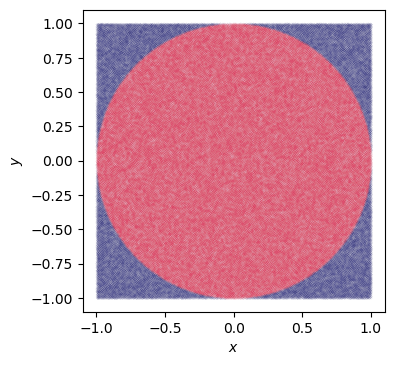

In [2]:
#Sampleamos 1 millón de pares de coordenadas (x,y)
x = np.random.uniform(-1,1,1000000)
y = np.random.uniform(-1,1,1000000)

#Evaluamos cada par, si es que cae dentro del círculo de radio 1
inside = x**2 + y**2 <= 1

#Como es un arreglo booleano y True es que está dentro, sumamos (True=1, False=0)
#Para el cuadrado, es simplemente el largo del arreglo, pues son todos
in_circle = np.sum(inside)
in_square = len(inside)

#Calculamos la razon
ratio = in_circle / in_square

#Un gráfico...
fig, ax = plt.subplots(dpi=100)
ax.plot(x[~inside], y[~inside], '.', ms=.1, alpha=.2, color='midnightblue')
ax.plot(x[inside], y[inside], '.', ms=.1, alpha=.2, color='crimson')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')

#Y el valor de pi
pi = 4 * ratio
print('pi = ',pi)

Esto claramente se puede compactar en un "Monte Carlo en 2 líneas", donde una es un import :)

In [3]:
import numpy as np
print('pi = ',4*np.sum(np.random.uniform(-1,1,1000000)**2 + np.random.uniform(-1,1,1000000)**2 < 1) / 1e6)

pi =  3.141624
